# 1번

## 1-1 insurance 데이터의 흡연 여부(smoker)에 따른 보험료(charges)의 분포 파악 위한 박스플롯을 그려주세요

조건1. matplotlib, seaborn 라이브러리를 각각 사용하여 그래프 총 2개를 그리고 간단한 해석도 함께 해주세요  
조건2. 수평 박스 플롯으로 그려주세요

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,height,children,smoker,region,charges
0,19,female,27.900,159,0,yes,southwest,16884.92400
1,18,male,33.770,178,1,no,southeast,1725.55230
2,28,male,33.000,184,3,no,southeast,4449.46200
3,33,male,22.705,180,0,no,northwest,21984.47061
4,32,male,28.880,175,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,167,3,no,northwest,10600.54830
1334,18,female,31.920,173,0,no,northeast,2205.98080
1335,18,female,36.850,144,0,no,southeast,1629.83350
1336,21,female,25.800,166,0,no,southwest,2007.94500


{'whiskers': [<matplotlib.lines.Line2D at 0x1ea1be61088>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea1be80fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea1be67f48>,
 'medians': [<matplotlib.lines.Line2D at 0x1ea1be8ae88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ea1be90948>,
 'means': []}

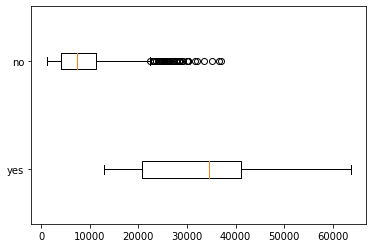

In [3]:
plt.boxplot(x = [insurance[insurance['smoker']=='yes']['charges'],
                 insurance[insurance['smoker']=='no']['charges']],
           labels = ['yes','no'], vert=False)

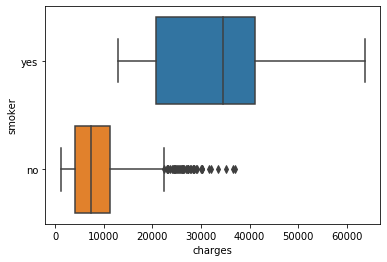

In [4]:
sns.boxplot(y=insurance['smoker'], x=insurance['charges'])
# 대체로 흡연자가 비흡연자에 비해 보험료가 높다. 비흡연자의 보험료는 이상치가 많다.

In [5]:
insurance.groupby('smoker')['charges'].agg([min , max, 'mean', 'median', 'std'])

,min,max,mean,median,std
smoker,,,,,
no,1121.8739,36910.60803,8434.268298,7345.40530,5993.781819
yes,12829.4551,63770.42801,32050.231832,34456.34845,11541.547176


## 1-2 위 그래프에 변수 'sex'를 추가해 색으로 구별하시오  
### (seaborn 라이브러리만 사용)

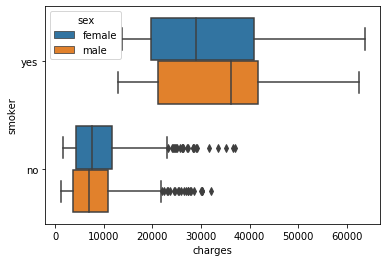

In [6]:
sns.boxplot(y=insurance['smoker'], x=insurance['charges'], hue=insurance['sex'])

## 1-3 'smoker'의 범주별로 'charges'와 'bmi'의 회귀선 포함한 산점도를 그리세요 그리고 'sex'는 색으로 구분해주세요  


조건   FacetGrid 사용  
힌트1. FacetGrid는 hue 옵션사용가능합니다  
힌트2. FacetGrid의 row, col 중 하나만 지정해도 그리드 생성됩니다

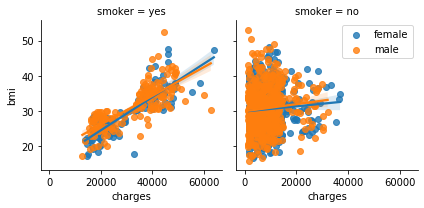

In [7]:
g = sns.FacetGrid(data = insurance, col = 'smoker', hue = 'sex')
g = g.map(sns.regplot, 'charges' ,'bmi')
plt.legend()

# 2번
### 다음과 같은 파이차트를 만드시오.
* IPython패키지를 설치해주세요.(anaconda promt에서 !pip install IPython 입력!)  
조건1. Matplotlib의 함수를 이용하시오.(plt.pie)  
조건2. Premium의 explode은 0.1이다.  
조건3. explode, labels, colors, autopct, shadow, startangle 옵션을 사용하시오.

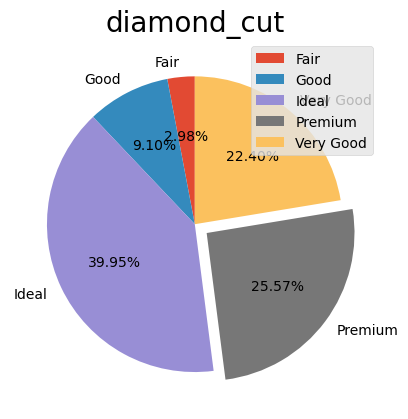

In [8]:
from IPython.display import Image

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./diamonds.csv')

Image('그림.png')

In [9]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
df['count']=1
df_cut = df.groupby('cut').sum()
df_cut

,carat,depth,table,price,x,y,z,count
cut,,,,,,,,
Fair,1684.28,103107.1,95076.6,7017600,10057.50,9954.07,6412.26,1610
Good,4166.10,305967.0,287955.9,19275009,28645.08,28703.75,17855.42,4906
Ideal,15146.84,1329899.3,1205814.4,74513487,118691.07,118963.24,73304.61,21551
Premium,12300.95,844901.1,810167.4,63221498,82385.88,81985.82,50297.49,13791
Very Good,9742.70,746888.4,700226.2,48107623,69359.09,69713.45,43009.52,12082


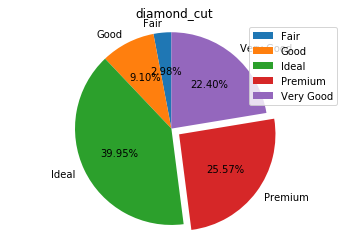

In [11]:
plt.pie(df_cut['count'], labels = df_cut.index, autopct = '%.2f%%', explode = (0,0,0,0.1,0), startangle = 90)
plt.title('diamond_cut')
plt.axis('equal')
plt.legend(labels =  df_cut.index)

# 3번 버블차트 그리기

## 3-1 airpollution_2018 데이터에서 NaN가 어떤 열들에 존재하는지 보기 위해 데이터 정보를 출력해주세요.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('airpollution_2018.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1499 non-null   int64  
 1   city      1499 non-null   object 
 2   NO2       1499 non-null   float64
 3   O3        1415 non-null   float64
 4   CO2       1499 non-null   float64
 5   SO2       1499 non-null   float64
 6   finedust  1466 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 82.1+ KB


## 3-2 각 열의 NaN 값들을 해당 열의 평균값으로 바꿔주세요. (기존 데이터를 변경해주세요!)

In [13]:
df.fillna(df.mean(), inplace = True)

In [14]:
df.isna().sum().sum()

0

In [15]:
df

,date,city,NO2,O3,CO2,SO2,finedust
0,20180101,강남구,0.033,1.579104,0.6,0.006,51.399045
1,20180101,강동구,0.038,1.579104,0.7,0.005,48.000000
2,20180101,강변북로,0.033,0.008000,0.6,0.005,48.000000
3,20180101,강북구,0.026,8.000000,0.6,0.004,38.000000
4,20180101,공항대로,0.045,0.007000,0.6,0.006,50.000000
...,...,...,...,...,...,...,...
1494,20180208,정릉로,0.052,0.005000,1.0,0.007,67.000000
1495,20180208,종로,0.059,0.006000,0.9,0.004,48.000000
1496,20180208,종로구,0.057,0.006000,0.9,0.007,45.000000
1497,20180208,중구,0.054,0.007000,0.9,0.004,44.000000


## 3- 3 O3 열의 값들을 O3 열의 최댓값으로 나누어 준 상대적 비율을 O3_size라는 변수에 저장해주세요!
### 그리고 크기 조정을 위해 100을 곱해주세요

In [16]:
df['O3_size'] = df['O3'] / df['O3'].max() * 100

In [17]:
df

,date,city,NO2,O3,CO2,SO2,finedust,O3_size
0,20180101,강남구,0.033,1.579104,0.6,0.006,51.399045,17.545599
1,20180101,강동구,0.038,1.579104,0.7,0.005,48.000000,17.545599
2,20180101,강변북로,0.033,0.008000,0.6,0.005,48.000000,0.088889
3,20180101,강북구,0.026,8.000000,0.6,0.004,38.000000,88.888889
4,20180101,공항대로,0.045,0.007000,0.6,0.006,50.000000,0.077778
...,...,...,...,...,...,...,...,...
1494,20180208,정릉로,0.052,0.005000,1.0,0.007,67.000000,0.055556
1495,20180208,종로,0.059,0.006000,0.9,0.004,48.000000,0.066667
1496,20180208,종로구,0.057,0.006000,0.9,0.007,45.000000,0.066667
1497,20180208,중구,0.054,0.007000,0.9,0.004,44.000000,0.077778


## 3-4 버블모양의 산점도를 그려주세요
#### (x축 : finedust, y축 : NO2, 색상 : skyblue, figsize : 가로 10pixel, 세로 5pixel, 크기 : O3_size, 투명도 : 0.3, plot 제목 : My Scatter Plot)

Text(0.5, 1.0, 'My Scatter Plot')

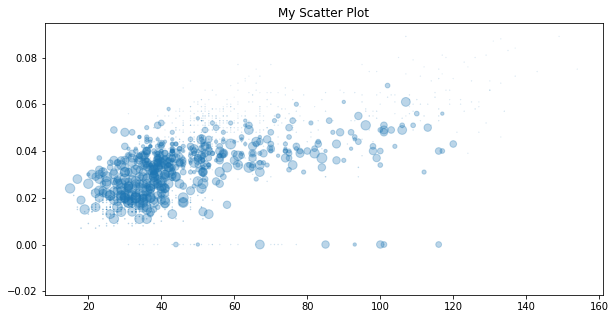

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(x = df['finedust'],y = df['NO2'], s = df['O3_size'], alpha=0.3)
plt.title('My Scatter Plot')

# 4. 데이터 타입과 그래프 타입 

Heights.csv 파일에는 ```6 개의 변수```를 가진 자료가 들어있다. 
+ ```earn``` : 연봉 (dollar)
+ ```height``` : 키 (inch)
+ ```sex``` : 성별
+ ```ed``` : 초등학교부터 교육을 받은 정도 (year)
+ ```age``` : 나이
+ ```race``` : 인종

아래의 각 항목을 알아보기 위해 적합한 ```그림```을 그리고 ```해석```하시오.

In [19]:
#matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"  #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

In [20]:
import pandas as pd

heights=pd.read_csv("heights.csv")
heights.head(10)

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white
5,9000.0,64.399508,female,15,26,white
6,29000.0,61.656326,female,12,49,white
7,32000.0,72.698544,male,17,46,white
8,2000.0,72.039467,male,15,21,hispanic
9,27000.0,72.234933,male,12,26,white


## 4-1. 연봉, 성별 변수 각각의 분포

## 4-2. 성별에 따라 연봉의 차이가 있는가?

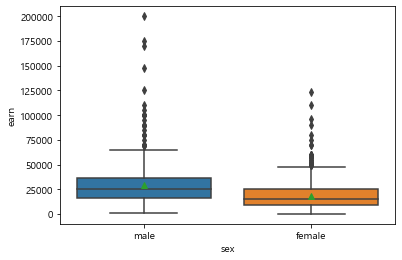

In [22]:
sns.boxplot(heights['sex'],heights['earn'], showmeans= True)
# 평균적으로 남성이 더 높다.

## 4-3. 인종별로 연봉의 차이가 있는가?

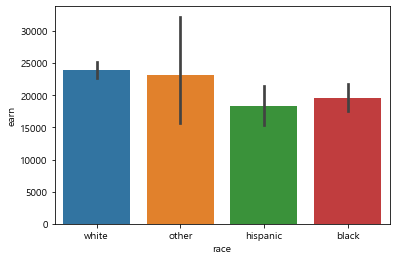

In [23]:
sns.barplot(heights['race'],heights['earn'])
# 대체로 비슷하지만 히스패닉이 유독 낮다

## 4-4. 연봉과 키가 관계가 있는가?

** 회귀선이 있는 그래프도 같이 그려보시오.

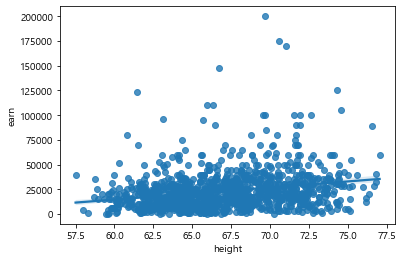

In [24]:
sns.regplot(heights['height'],heights['earn'])
# 관계 없음

## 4-5. 인종별로 성별에 따라 연봉차이가 있는가?

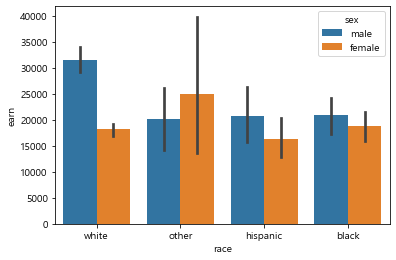

In [25]:
sns.barplot(heights['race'],heights['earn'],hue=heights['sex'])
# 대체로 그렇다. 백인,흑인,히스패닉이 아닌 타 인종의 경우 여성의 연봉이 높으나 25건으로 전체적으로 보아 유의미한 숫자는 아니다.

In [26]:
heights['race'].value_counts()

white       989
black       112
hispanic     66
other        25
Name: race, dtype: int64